# Implementação do Support Vector Machine

Implementação e explicação de códigos de SVM utilizando o repositório em python scikit-learn. Com efeito serão abordados códigos exemplos do scikit-learn modificados pelo autor voltados para utilização do Support
Vector Machine utilizando o kernel RBF (Radius Base Function).

In [29]:
# Importação do banco de dados a ser utilizado nos exemplos
from sklearn import datasets

iris = datasets.load_iris()

# Nesse banco de dados, os principais valores que iremos utilizar serão as entradas (iris.data) e as saídas (iris.target)
X = iris.data
Y = iris.target

print("Descrição das entradas: \n", iris.feature_names)
print("Tamanho :", X.shape)
print("Entrada (apenas 5 linhas): \n", X[0:5])

Descrição das entradas: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tamanho : (150, 4)
Entrada (apenas 5 linhas): 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### One-class SVM with non-linear kernel (RBF) | SVM com kernel não linear (RBF) para classes unitárias de dados

Esse algoritmo é um exemplo de método não supervisionado que serve para classificar amostras como similares ou diferentes do grupo de dados de treinamento. Esse exemplo é utilizado principalmente para detectar
anomalias.


In [30]:
# Importação das bibliotecas a serem utilizadas:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [31]:
# Esse algoritmo se diferencia um pouco dos outros que serão listados, uma vez que a intenção aqui é validar a coerência de um banco de dados.
# Sendo assim iremos dividir X em três conjuntos. O primeiro será para treinamento e terá 100 elementos somente de 'sepal length (cm)'.
# O segundo será para teste e terá 50 elementos de 'sepal length (cm)'. O terceiro e último será para teste de anomalias terá 50 elementos de 'sepal width (cm)'.

X_train = X[:100, 0].reshape(-1, 1) # O .reshape(-1, 1) é utilizado pois estamos trabalhando com apenas uma entrada.
X_test = X[100:150, 0].reshape(-1, 1)
X_outliers = X[:50, 1].reshape(-1, 1)

In [32]:
# Agora iremos criar e ajustar o modelo com o conjunto de treinamento:
# Pode-se escolher entradas adicionais listadas aqui https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

clf = svm.OneClassSVM(kernel="rbf", nu=0.05, gamma=0.1)
clf.fit(X_train)

# E assim, obter os modelos de predição:

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)
Y_pred_outliers = clf.predict(X_outliers)

# Resultado = 1 -> Acerto | Resultado = -1 -> Erro
# Número de erros em cada modelo:

n_error_train = Y_pred_train[Y_pred_train == -1].size
n_error_test = Y_pred_test[Y_pred_test == -1].size
n_error_outliers = Y_pred_outliers[Y_pred_outliers == 1].size

print(f'Dados de treinamento: 1) Erro = {n_error_train/Y_pred_train.size} \n 2) Predição: {Y_pred_train} \n')
print(f'Dados de teste: 1) Erro = {n_error_test/Y_pred_test.size} \n 2) Predição: {Y_pred_test} \n')
print(f'Dados de anomalias: 1) Erro = {n_error_outliers/Y_pred_outliers.size} \n 2) Predição: {Y_pred_outliers} \n')

Dados de treinamento: 1) Erro = 0.03 
 2) Predição: [ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1] 

Dados de teste: 1) Erro = 0.3 
 2) Predição: [ 1  1 -1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1  1 -1  1
  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1
  1  1] 

Dados de anomalias: 1) Erro = 0.02 
 2) Predição: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] 



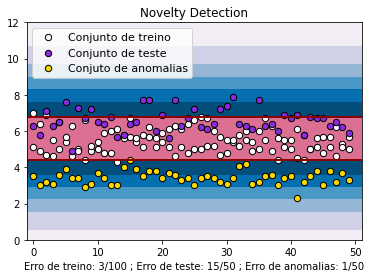

In [33]:
# Ademais podemos visualizar os resultados utilizando a função decisão do modelo clf:

xx, yy = np.meshgrid(np.linspace(-1, 51, 500), np.linspace(-1, 51, 500)) # Cria uam malha para plotar o mapa de calor

# Plota as linhas para a função de decisão

Z = clf.decision_function(np.c_[yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
s = 40
b1 = plt.scatter(range(0,50), X_train[:50], c="white", s=s, edgecolors="k")
b12 = plt.scatter(range(0,50), X_train[50:100], c="white", s=s, edgecolors="k")
b2 = plt.scatter(range(0,50), X_test, c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(range(0,50), X_outliers, c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-1, 51))
plt.ylim((0, 12))
plt.legend(
 [b1, b2, c],
 [
 "Conjunto de treino",
 "Conjunto de teste",
 "Conjuto de anomalias",
 ],
 loc="upper left",
 prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
 "Erro de treino: %d/100 ; Erro de teste: %d/50 ; Erro de anomalias: %d/50"
 % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()

In [34]:
# Importação das bibliotecas a serem utilizadas:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
# Para esse algoritmo, a ideia é dividir o conjunto (X e Y), dos valores importados no início, em entradas e saídas de treinamento e teste
# (X_train e X_test, Y_train e Y_test) de uma maneira a encontrar os melhores valores desse conjunto, entre 100 loops,
# que resultaram nos modelos mais exatos para os diferentes valores de C e gamma que definiremos.

modelos = []

for j in range(100):
    
    # Dividimos o conjunto de dados, sendo 30% para teste e 70% para treinamento:
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    # Iremos definar 3 valores para gamma e 3 valores para C, cruzando todos os possíveis parâmetros e montando um total de 9 classificadores diferentes:
    
    C_ = [1e-2, 1, 1e2]
    gamma_ = [1e-1, 1, 1e1]
    classifiers = []
    accuracy_total = 0
    
    # Para cada modelo, guardaremos o valor de C, gamma, clf e a accuracy
    
    for C in C_:
        for gamma in gamma_:
            clf = SVC(C=C, gamma=gamma)
            clf.fit(X_train, Y_train)
            Y_pred = clf.predict(X_test)
            accuracy = metrics.accuracy_score(Y_test, Y_pred)
            accuracy_total += accuracy
            classifiers.append((C, gamma, clf, accuracy))
    
    # Agora obtido os classifiers e a accuracy_total, iremos guardar em modelos esses valores e o conjunto dividido:

    modelos.append((classifiers, accuracy_total, [X_train, X_test, Y_train, Y_test]))

# Agora, obtidos os modelos, iremos ordenar de forma crescente tendo em vista a accuracy_total:
for i in range(len(modelos)):
    for j in range(i + 1, len(modelos)):
        if modelos[i][1] > modelos[j][1]:
            modelos[i], modelos[j] = modelos[j], modelos[i]

# Dessa forma, conseguimos achar o modelo que tem o melhor desempenho:

best_classifiers = modelos[-1][0]
best_accuracy_total = modelos[-1][1]
best_train_test = modelos[-1][2]

# Assim, iremos ordenar o modelo best para achar os melhores valores para C e gamma

for i in range(len(best_classifiers)):
    for j in range(i + 1, len(best_classifiers)):
        if best_classifiers[i][3] > best_classifiers[j][3]:
            best_classifiers[i], best_classifiers[j] = best_classifiers[j], best_classifiers[i]

# Logo, o melhor classifiers será:

best_model = best_classifiers[-1][2]
C = best_classifiers[-1][0]
gamma = best_classifiers[-1][1]

X_train = best_train_test[0]
X_test = best_train_test[1]
Y_train = best_train_test[2]
Y_test = best_train_test[3]

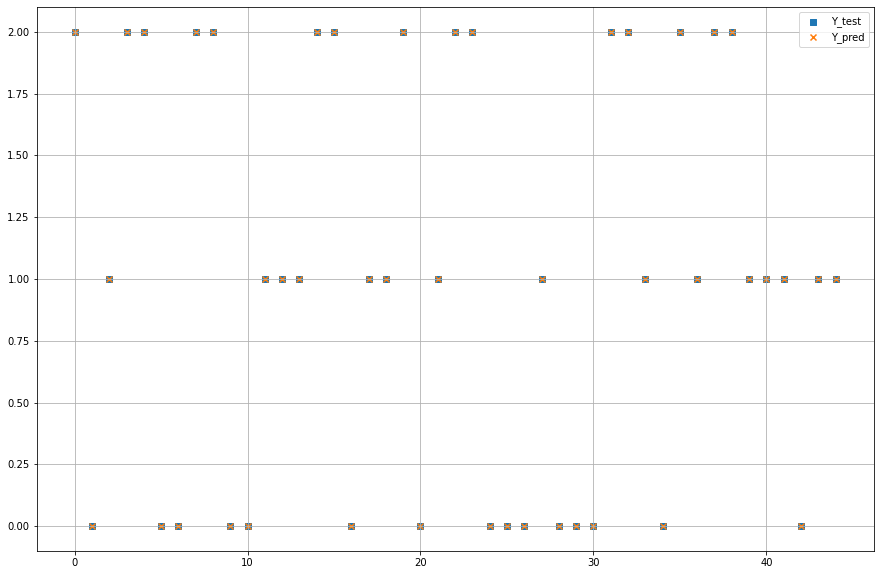

In [36]:
# Assim conseguimos achar o melhor modelo dentre 100 testados, o que ainda não é o melhor. Com isso, vamos plotar os resultados para ter uma visualização gráfica:
plt.figure(figsize=(15, 10))
plt.scatter(range(len(Y_test)), Y_test, label="Y_test", marker="s")
plt.scatter(range(len(Y_test)), best_model.predict(X_test), label="Y_pred", marker='x')
plt.legend()
plt.grid()
plt.savefig("test")

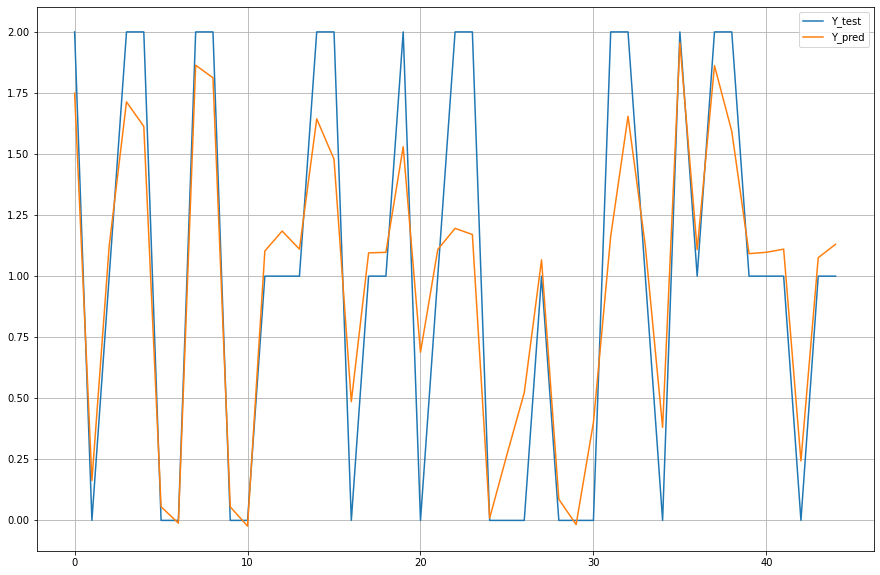

In [37]:
# O modelo de regressão será:
from sklearn.svm import SVR

svr = SVR(kernel="rbf", C=C, gamma=gamma)
svr.fit(X_train, Y_train)

plt.figure(figsize=(15, 10))
plt.plot(range(len(Y_test)), Y_test, label="Y_test")
plt.plot(range(len(Y_test)), svr.predict(X_test), label="Y_pred")
plt.legend()
plt.grid()
plt.savefig("testR")

A accuaracy obtido foi de: 0.9407407407407408


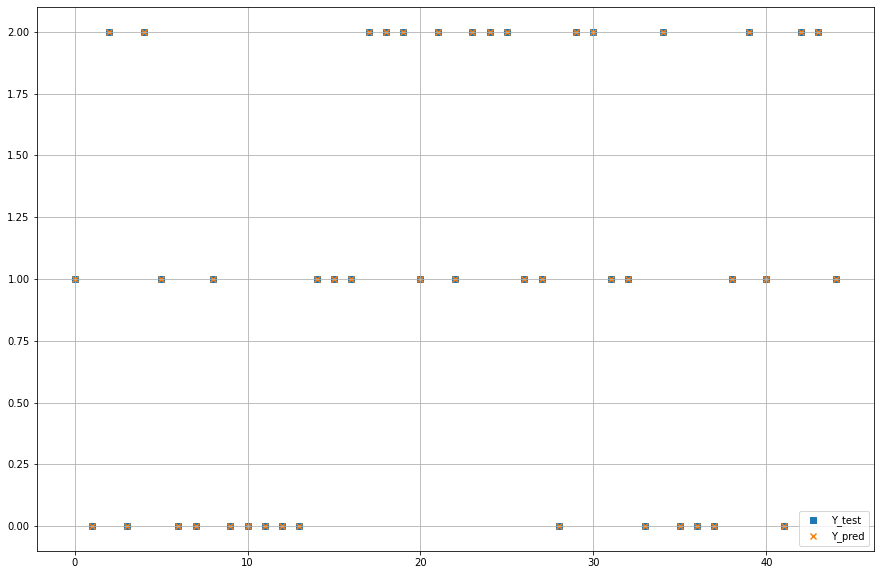

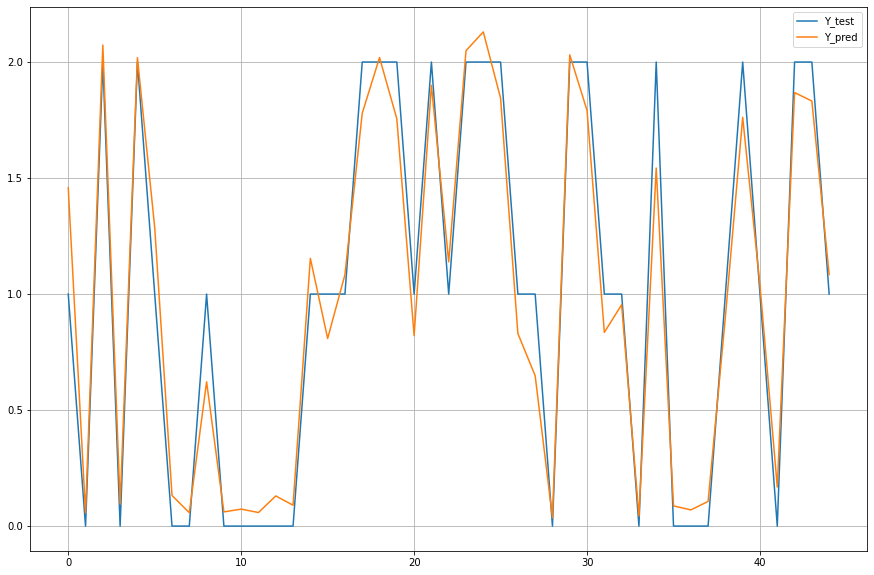

In [38]:
# Ainda assim, podemos modificar tudo feito para achar um modelo com um valor mímino para a accuracy:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics


accuracy_media = 0
while accuracy_media <= 0.9:

    accuracy_media = 0

    # Dividimos o conjunto de dados, sendo 30% para teste e 70% para treinamento:

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    # Iremos definar 3 valores para gamma e 3 valores para C, cruzando todos os possíveis parâmetros e montando um total de 9 classificadores diferentes:
    
    C_ = [1e-2, 1, 1e2]
    gamma_ = [1e-1, 1, 1e1]
    classifiers = []
    
    # Para cada modelo, guardaremos o valor de C, gamma, clf e a accuracy
    
    for C in C_:
        for gamma in gamma_:
            clf = SVC(C=C, gamma=gamma)
            clf.fit(X_train, Y_train)
            Y_pred = clf.predict(X_test)
            accuracy = metrics.accuracy_score(Y_test, Y_pred)
            accuracy_media += accuracy
            classifiers.append((C, gamma, clf, accuracy))
    accuracy_media = accuracy_media/9
print(f'A accuaracy obtido foi de: {accuracy_media}')

# Assim, iremos ordenar o modelo best para achar os melhores valores para C e gamma

for i in range(len(classifiers)):
    for j in range(i + 1, len(classifiers)):
        if classifiers[i][3] > classifiers[j][3]:
            classifiers[i], classifiers[j] = classifiers[j], classifiers[i]

# Logo, o melhor classifiers será:

best_model = classifiers[-1][2]
C = classifiers[-1][0]
gamma = classifiers[-1][1]

plt.figure(figsize=(15, 10))
plt.scatter(range(len(Y_test)), Y_test, label="Y_test", marker="s")
plt.scatter(range(len(Y_test)), best_model.predict(X_test), label="Y_pred", marker='x')
plt.legend()
plt.grid()

from sklearn.svm import SVR

svr = SVR(kernel="rbf", C=C, gamma=gamma)
svr.fit(X_train, Y_train)

plt.figure(figsize=(15, 10))
plt.plot(range(len(Y_test)), Y_test, label="Y_test")
plt.plot(range(len(Y_test)), svr.predict(X_test), label="Y_pred")
plt.legend()
plt.grid()